In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("depression_dataset_treated.csv")

In [3]:
df.head()

,Age,CGPA,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male,Student,Satisfaction,Pressure
0,37,7.605,7.5,2,0,6,2,0,0,0,1,4.0,2.0
1,60,7.605,5.5,1,1,0,4,1,0,1,1,3.0,4.0
2,42,7.605,5.5,2,0,0,2,0,0,0,1,3.0,2.0
3,44,7.605,7.5,3,1,1,2,1,0,0,1,5.0,3.0
4,48,7.605,7.5,2,1,6,5,1,0,1,1,3.0,4.0


In [4]:
df.describe()

,Age,CGPA,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male,Student,Satisfaction,Pressure
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,39.043036,7.597696,6.486307,1.984351,0.488654,6.023865,2.968701,0.487089,0.178013,0.521518,0.803599,3.026995,3.018388
std,12.260596,0.649056,1.899945,0.821286,0.499969,3.771743,1.415527,0.499931,0.382598,0.499635,0.397353,1.409659,1.411739
min,18.000000,5.030000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,28.000000,7.605000,4.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000
50%,39.000000,7.605000,7.500000,2.000000,0.000000,6.000000,3.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000
75%,50.000000,7.605000,7.500000,3.000000,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,1.000000,4.000000,4.000000
max,60.000000,10.000000,9.000000,3.000000,1.000000,12.000000,5.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000


In [5]:
# Separar variáveis dependentes e independentes
x = df.drop(columns=['Depression'])
y = df.Depression

<AxesSubplot:>

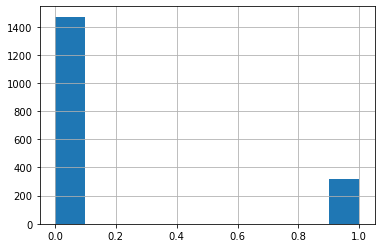

In [6]:
# Dividir o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y)

y_train.hist()

### Aplicar Oversampling nos dados de treino com SMOTE para obter melhores resultados, pois o dataset está altamente desbalanceado sendo apenas 17,80% depressivos e 82,20% não depressivos

<AxesSubplot:>

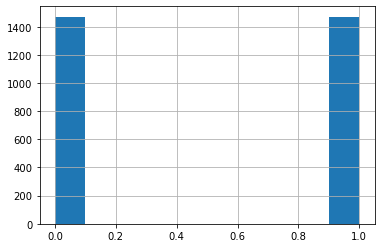

In [7]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_resampled.hist()

In [8]:
# Criação do modelo
rf_smote = RandomForestClassifier()

# Treinamento do modelo
rf_smote.fit(X_train_resampled, y_train_resampled)

# Previsão
y_pred = rf_smote.predict(X_test)

# Avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       630
           1       0.84      0.85      0.84       137

    accuracy                           0.94       767
   macro avg       0.90      0.91      0.90       767
weighted avg       0.94      0.94      0.94       767



### GridSearchCV para procurar por melhores parâmetros visando obter melhores resultados

In [9]:
rf_grid = rf_smote

# Parâmetros a serem otimizados
param_grid = {
    # Número de árvores 
    'n_estimators': [100, 200, 300, 500],
    # Profundidade máxima das árvores
    'max_depth': [None, 10, 20],
    # Número mínimo de amostrar para separar um nó
    'min_samples_split': [2, 5],
    # Mínimo de amostra por folha
    'min_samples_leaf': [1, 2]
}

# Parâmetros "padrões" para entender como o treinamento se comporta

# Configurando GridSearch
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=3, scoring='accuracy', verbose=3)

# Treinando o modelo com os dados
model_grid = grid_search.fit(X_train_resampled, y_train_resampled)

# Resultados dos parâmetros encontrados no GridSearch
print("Melhores parâmetros: ", grid_search.best_params_)
print("Melhores Modelo: ", grid_search.best_estimator_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.933 total time=   0.3s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.968 total time=   0.2s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.979 total time=   0.3s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.934 total time=   0.5s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.965 total time=   0.5s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.979 total time=   0.5s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.936 total time=   0.7s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.9

In [10]:
# Criação do modelo com os melhores parâmetros de acordo com o GridSearch
rf_optimized = model_grid.best_estimator_
rf_optimized

RandomForestClassifier(min_samples_split=5)

In [11]:
y_pred_optimized = rf_optimized.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       630
           1       0.84      0.87      0.85       137

    accuracy                           0.95       767
   macro avg       0.90      0.92      0.91       767
weighted avg       0.95      0.95      0.95       767



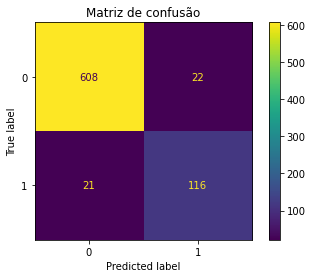

In [12]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_smote.classes_)
disp.plot()
plt.title("Matriz de confusão")
plt.show()

In [13]:
y_scores = rf_optimized.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)  
roc_auc = auc(fpr, tpr)  

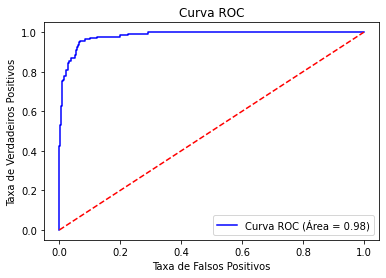

In [14]:
plt.figure()  
plt.plot(fpr, tpr, color='blue', label='Curva ROC (Área = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('Taxa de Falsos Positivos')  
plt.ylabel('Taxa de Verdadeiros Positivos')  
plt.title('Curva ROC')  
plt.legend(loc='lower right')  
plt.show()  